`Receiver Operating Characteristic (ROC)` feature True Positive Rate (TPR) on the y-axis, and False Positive Rate (FPR) on the x-axis. 
- "steepness" of ROC curve is important as it is ideal to maximise the TPR while minimising FPR, and also larger the Area Under Curve (AUC), more suitable a model is

In [2]:
import numpy as np 
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
target_name = iris.target_names 
X, y = iris.data, iris.target 
X, y = X[y != 2], y[y !=2]
n_samples, n_features = X.shape

In [4]:
#adding noise 

random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)


Classification and ROC Analysis

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn import svm 
from sklearn.metrics import auc 
from sklearn.metrics import RocCurveDisplay 
from sklearn.model_selection import StratifiedKFold 

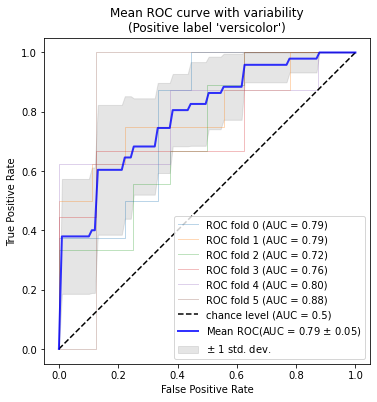

In [7]:
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots(figsize=(6,6))
for fold, (train, test) in enumerate(cv.split(X,y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier, X[test], y[test], name =f"ROC fold {fold}",
        alpha=0.3,
        lw=1,ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0,1],[0,1],"k--",label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0 
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',label=r"Mean ROC(AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
lw=2,alpha=0.8,
)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_name[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

